In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('moviereviews.csv')

In [33]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## Missing Values

In [35]:
df.isnull().sum()

label      0
review    35
dtype: int64

## Remove any reviews that are NaN

In [36]:
df.dropna(subset= ['review'],inplace=True)

In [37]:
df.isnull().sum()

label     0
review    0
dtype: int64

## Remove any reviews that are blank_string

In [38]:
df['review'].str.isspace().sum()

27

In [39]:
df = df[~df['review'].str.isspace()]

In [40]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


## the value counts per label

In [50]:
df.groupby(['label']).count()

,review
label,
neg,969
pos,969


## EDA on Bag of Words

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
count_vect = CountVectorizer(stop_words='english')

In [60]:
matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0]) 
# sort from largest to smallest
print (sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [61]:
matrix = count_vect.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(count_vect.get_feature_names(), matrix.sum(axis=0).tolist()[0]) 
# sort from largest to smallest
print (sorted(freqs, key=lambda x: -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


## Training and Splitting Data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X= df['review']
y=df['label']

In [64]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Training a Model

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [78]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC())])

In [79]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [94]:
from sklearn.metrics import classification_report,plot_confusion_matrix


In [95]:
preds = pipe.predict(X_test)

In [96]:
print(classification_report(y_test , preds))

              precision    recall  f1-score   support

         neg       0.86      0.86      0.86       194
         pos       0.86      0.86      0.86       194

    accuracy                           0.86       388
   macro avg       0.86      0.86      0.86       388
weighted avg       0.86      0.86      0.86       388



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


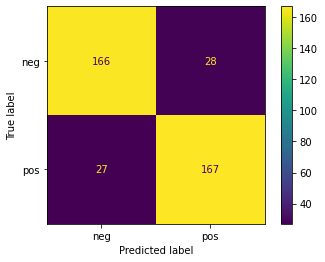

In [97]:
plot_confusion_matrix(pipe,X_test,y_test)